In [ ]:
# Random selection may have some influence over the data in this pool as there are many more than 500 cities in the world, a complete data set could lead to much different looking results.
# Temperature and latitude correlate strongly, latitudes with higher absolute value generally have lower temperatures than other locations with smaller latitude values.
# There is a much less strong correlation between Humidity and latitude, with a very slight tendency to have higher humidity in the 0-20 and 40-60 intervals.
# There seems to be almost no relationship between cloudiness and latitude.
# There is a low level of correlation between wind speed and latitude, with a slight tendency toward higher wind speed with latitudes above zero but not in a convincing manner.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from citipy import citipy
import random
import csv
import requests
import time
from api_keys import api_key

In [2]:
#Import CSV file, and read into DataFrame.

world_data = pd.read_csv("worldcities.csv")

#Preview the data.
world_data.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [13]:
# Randomly select 500 cities .

selected_cities = world_data.sample(n=500)

#Visualize the DataFrame.

selected_cities.head()

,Country,City,Latitude,Longitude
9127,de,kongen,48.683333,9.366667
36342,ru,kinel,53.225708,50.629074
1076,ba,cecava,44.686667,17.770556
14580,gt,san antonio ilotenango,15.054722,-91.229722
41910,ua,zatoka,46.072512,30.465384


In [6]:
#Count

row_count = 0

# Blank columns for the new fields to be added.

selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""

# Loop through and get the weather data from the Open Weather API.

for index, row in selected_cities.iterrows():
    #Sleep to avoid hitting call limit
    
    time.sleep(1)
    
    # url components
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    # construct query url
    query_url = url + "lat="+ str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key + "&units=" + units
    #Print for each query to gut check, increase count variable when complete.
    
    print("Now retieving city # " + str(row_count))
    print(query_url)
    row_count += 1
    
    #Requests to grab the JSON at the requested URL
    
    city_weather = requests.get(query_url).json()
    
    #Append the weather data to dataframe columns, use try/except to skip any cities with errors.
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")
        
selected_cities  

Now retieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=43.866667&lon=10.816667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial


C:\Users\KevinS\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\KevinS\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\KevinS\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\KevinS\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=8.1551&lon=122.9311&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=40.873611100000005&lon=71.10888890000001&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=-0.9166667&lon=-80.4333333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=53.95&lon=-8.95&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=10.556961&lon=123.147502&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 6
https://api.openweathermap.org/data/2.5/weather?lat=61.566667&lon=11.066667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 7
https://api.openweathermap.org/data/2.5/weather?la

Now retieving city # 54
https://api.openweathermap.org/data/2.5/weather?lat=19.683332999999998&lon=75.016667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 55
https://api.openweathermap.org/data/2.5/weather?lat=22.433332999999998&lon=-100.283333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 56
https://api.openweathermap.org/data/2.5/weather?lat=18.396666699999997&lon=-67.11361109999999&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 57
https://api.openweathermap.org/data/2.5/weather?lat=11.083333&lon=39.733333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 58
https://api.openweathermap.org/data/2.5/weather?lat=55.6&lon=26.4166667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 59
https://api.openweathermap.org/data/2.5/weather?lat=25.7055556&lon=-80.3525&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 60
https://api.openwe

Now retieving city # 107
https://api.openweathermap.org/data/2.5/weather?lat=9.55&lon=-79.65&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 108
https://api.openweathermap.org/data/2.5/weather?lat=57.63333299999999&lon=18.3&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 109
https://api.openweathermap.org/data/2.5/weather?lat=53.516667000000005&lon=8.133333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 110
https://api.openweathermap.org/data/2.5/weather?lat=43.85&lon=23.8&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 111
https://api.openweathermap.org/data/2.5/weather?lat=-0.75&lon=-48.033333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 112
https://api.openweathermap.org/data/2.5/weather?lat=49.366667&lon=7.133333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 113
https://api.openweathermap.org/data/2.5/weather?lat=45.

Now retieving city # 160
https://api.openweathermap.org/data/2.5/weather?lat=44.3&lon=25.466667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 161
https://api.openweathermap.org/data/2.5/weather?lat=-7.7202779999999995&lon=110.299167&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 162
https://api.openweathermap.org/data/2.5/weather?lat=39.720833299999995&lon=45.1838889&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 163
https://api.openweathermap.org/data/2.5/weather?lat=31.863889&lon=117.280833&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 164
https://api.openweathermap.org/data/2.5/weather?lat=18.133333&lon=-93.016667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 165
https://api.openweathermap.org/data/2.5/weather?lat=34.766667&lon=135.416667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 166
https://api.openweathermap

Now retieving city # 213
https://api.openweathermap.org/data/2.5/weather?lat=36.4009&lon=47.1133&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 214
https://api.openweathermap.org/data/2.5/weather?lat=53.38333299999999&lon=10.716667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 215
https://api.openweathermap.org/data/2.5/weather?lat=50.6417&lon=40.927&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 216
https://api.openweathermap.org/data/2.5/weather?lat=9.7&lon=78.483333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 217
https://api.openweathermap.org/data/2.5/weather?lat=36.551321&lon=52.678951&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 218
https://api.openweathermap.org/data/2.5/weather?lat=-17.466666699999998&lon=24.3&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 219
https://api.openweathermap.org/data/2.5/weather

Now retieving city # 266
https://api.openweathermap.org/data/2.5/weather?lat=4.761389&lon=119.4075&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 267
https://api.openweathermap.org/data/2.5/weather?lat=52.531713&lon=4.705922&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 268
https://api.openweathermap.org/data/2.5/weather?lat=-23.066667000000002&lon=-51.033333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 269
https://api.openweathermap.org/data/2.5/weather?lat=40.593993&lon=-4.144851&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 270
https://api.openweathermap.org/data/2.5/weather?lat=1.905743&lon=-75.154059&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 271
https://api.openweathermap.org/data/2.5/weather?lat=47.833333&lon=-69.533333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 272
https://api.openweathermap.org/data/

Now retieving city # 319
https://api.openweathermap.org/data/2.5/weather?lat=49.546402&lon=39.089867&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 320
https://api.openweathermap.org/data/2.5/weather?lat=60.487777799999996&lon=-151.05833330000002&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 321
https://api.openweathermap.org/data/2.5/weather?lat=39.0166667&lon=-84.6008333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 322
https://api.openweathermap.org/data/2.5/weather?lat=58.744834999999995&lon=57.690495999999996&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 323
https://api.openweathermap.org/data/2.5/weather?lat=47.833333&lon=20.7&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 324
https://api.openweathermap.org/data/2.5/weather?lat=48.883333&lon=9.533333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 325
https://api

Now retieving city # 371
https://api.openweathermap.org/data/2.5/weather?lat=32.9786111&lon=-115.52944440000002&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 372
https://api.openweathermap.org/data/2.5/weather?lat=52.73679&lon=15.228775&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 373
https://api.openweathermap.org/data/2.5/weather?lat=-37.25&lon=-73.31666700000001&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 374
https://api.openweathermap.org/data/2.5/weather?lat=43.536188&lon=1.344141&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 375
https://api.openweathermap.org/data/2.5/weather?lat=12.483333300000002&lon=106.01666670000002&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 376
https://api.openweathermap.org/data/2.5/weather?lat=43.716667&lon=12.633333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 377
https://api.

Now retieving city # 424
https://api.openweathermap.org/data/2.5/weather?lat=51.216667&lon=6.766667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 425
https://api.openweathermap.org/data/2.5/weather?lat=41.25&lon=13.616667000000001&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 426
https://api.openweathermap.org/data/2.5/weather?lat=40.397778&lon=49.898610999999995&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 427
https://api.openweathermap.org/data/2.5/weather?lat=5.925833&lon=-75.670556&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 428
https://api.openweathermap.org/data/2.5/weather?lat=7.558167&lon=99.610528&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 429
https://api.openweathermap.org/data/2.5/weather?lat=51.666667&lon=9.65&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 430
https://api.openweathermap.org/data/2.

Now retieving city # 476
https://api.openweathermap.org/data/2.5/weather?lat=47.516667&lon=20.15&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 477
https://api.openweathermap.org/data/2.5/weather?lat=54.6333333&lon=24.9333333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 478
https://api.openweathermap.org/data/2.5/weather?lat=43.9&lon=24.616667&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 479
https://api.openweathermap.org/data/2.5/weather?lat=40.506667&lon=46.825&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 480
https://api.openweathermap.org/data/2.5/weather?lat=44.025556&lon=43.050278000000006&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 481
https://api.openweathermap.org/data/2.5/weather?lat=38.6666667&lon=-90.3208333&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial
Now retieving city # 482
https://api.openweathermap.org/data/2.5/wea

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
20643,it,monsummano terme,43.866667,10.816667,71.71,88,0,4.7
27138,ph,bacungan,8.155100,122.931100,83.54,83,48,13.4
46269,uz,pop,40.873611,71.108889,80.6,44,40,2.24
10375,ec,rocafuerte,-0.916667,-80.433333,82.4,74,40,11.41
16714,ie,swinford,53.950000,-8.950000,54.92,100,64,8.37
29380,ph,pandanon,10.556961,123.147502,79.94,83,92,13.67
25918,no,koppang,61.566667,11.066667,57.71,74,12,4.56
25822,no,espeland,60.383333,5.466667,58.43,90,88,2.59
35980,ru,idrinskoye,54.370833,92.135833,47.9,87,0,2.48
16936,in,andippatti,9.983333,77.633333,67.97,88,88,3.89


In [7]:
selected_cities.to_csv("WorldWeatherData.csv", index=False)

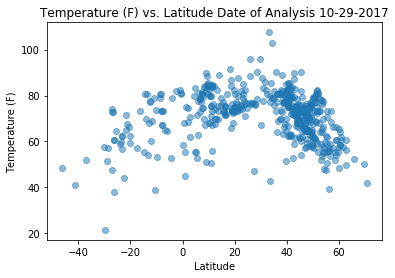

In [8]:
plt.scatter(selected_cities["Latitude"],selected_cities["Temperature"], alpha = 0.5)

plt.title("Temperature (F) vs. Latitude Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

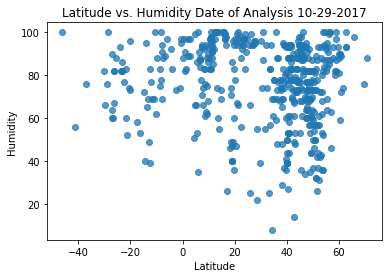

In [9]:
plt.scatter(selected_cities["Latitude"],selected_cities["Humidity"], alpha = 0.75)

plt.title("Latitude vs. Humidity Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

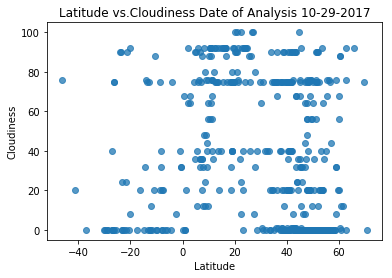

In [10]:
plt.scatter(selected_cities["Latitude"],selected_cities["Cloudiness"], alpha = 0.75)

plt.title("Latitude vs.Cloudiness Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

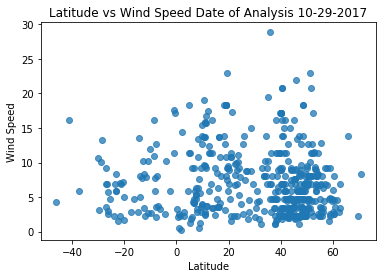

In [11]:
plt.scatter(selected_cities["Latitude"],selected_cities["Wind Speed"], alpha= 0.75)
plt.title("Latitude vs Wind Speed Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

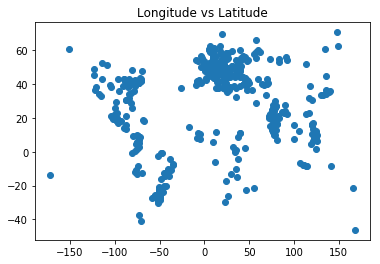

In [12]:
plt.scatter(selected_cities["Longitude"],selected_cities["Latitude"])
plt.title("Longitude vs Latitude")
plt.show()